In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
movieRatings = pd.read_csv("/content/drive/MyDrive/Working Data/tv_shows.csv")

## Cleanup the data

### Remove unnamed columns as index column

In [6]:
movieRatings.head(n=5)

,Unnamed: 0,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,type
0,0,Breaking Bad,2008,18+,9.5,96%,1,0,0,0,1
1,1,Stranger Things,2016,16+,8.8,93%,1,0,0,0,1
2,2,Money Heist,2017,18+,8.4,91%,1,0,0,0,1
3,3,Sherlock,2010,16+,9.1,78%,1,0,0,0,1
4,4,Better Call Saul,2015,18+,8.7,97%,1,0,0,0,1


In [7]:
movieRatings.columns[0]

'Unnamed: 0'

In [9]:
movieRatings = pd.read_csv("/content/drive/MyDrive/Working Data/tv_shows.csv", index_col=[0])

In [10]:
movieRatings.columns

Index(['Title', 'Year', 'Age', 'IMDb', 'Rotten Tomatoes', 'Netflix', 'Hulu',
       'Prime Video', 'Disney+', 'type'],
      dtype='object')

In [11]:
movieRatings.head(n=5)

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,type
0,Breaking Bad,2008,18+,9.5,96%,1,0,0,0,1
1,Stranger Things,2016,16+,8.8,93%,1,0,0,0,1
2,Money Heist,2017,18+,8.4,91%,1,0,0,0,1
3,Sherlock,2010,16+,9.1,78%,1,0,0,0,1
4,Better Call Saul,2015,18+,8.7,97%,1,0,0,0,1


In [ ]:
movieRatings.shape

(5611, 10)

In [ ]:
movieRatings.describe()

,Year,IMDb,Netflix,Hulu,Prime Video,Disney+,type
count,5611.000000,4450.000000,5611.000000,5611.000000,5611.000000,5611.000000,5611.0
mean,2011.021030,7.113258,0.344145,0.312600,0.382107,0.032080,1.0
std,11.005116,1.132060,0.475131,0.463594,0.485946,0.176228,0.0
min,1901.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,2010.000000,6.600000,0.000000,0.000000,0.000000,0.000000,1.0
50%,2015.000000,7.300000,0.000000,0.000000,0.000000,0.000000,1.0
75%,2017.000000,7.900000,1.000000,1.000000,1.000000,0.000000,1.0
max,2020.000000,9.600000,1.000000,1.000000,1.000000,1.000000,1.0


In [ ]:
movieRatings.IMDb.describe()

count    4450.000000
mean        7.113258
std         1.132060
min         1.000000
25%         6.600000
50%         7.300000
75%         7.900000
max         9.600000
Name: IMDb, dtype: float64

### Check duplicated data

In [ ]:
movieRatings.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
5606    False
5607    False
5608    False
5609    False
5610    False
Length: 5611, dtype: bool

### Check null data

In [ ]:
# Run isnull call and get these fields with False are classified the null.
movieRatings.isnull()

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,type
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
5606,False,False,True,True,True,False,False,False,False,False
5607,False,False,True,True,True,False,False,False,False,False
5608,False,False,True,True,True,False,False,False,False,False
5609,False,False,True,True,True,False,False,False,False,False


In [ ]:
movieRatings.dropna(axis=0, how='any').shape

(931, 10)

### Drop all null data and columns are no changed but rows are reduced to 931.

In [ ]:
movieRatings.dropna(axis=0, how='any', inplace=True)

In [ ]:
movieRatings.shape

(931, 10)

### Check datatype of each column

In [ ]:
movieRatings.dtypes

Title               object
Year                 int64
Age                 object
IMDb               float64
Rotten Tomatoes     object
Netflix              int64
Hulu                 int64
Prime Video          int64
Disney+              int64
type                 int64
dtype: object

### Question 1:  What are the top 10 rate movies according to Rotten Tomatoes

In [ ]:
movieRatings.rename(columns = {'Rotten Tomatoes':'RottenTomatoes'}, inplace = True)

In [ ]:
movieRatings.head(n=5)

,Title,Year,Age,IMDb,RottenTomatoes,Netflix,Hulu,Prime Video,Disney+,type
0,Breaking Bad,2008,18+,9.5,96%,1,0,0,0,1
1,Stranger Things,2016,16+,8.8,93%,1,0,0,0,1
2,Money Heist,2017,18+,8.4,91%,1,0,0,0,1
3,Sherlock,2010,16+,9.1,78%,1,0,0,0,1
4,Better Call Saul,2015,18+,8.7,97%,1,0,0,0,1


In [ ]:
movieRatings['RottenTomatoes'] = movieRatings['RottenTomatoes'].apply(lambda x: x.replace('%', '')).astype("int64")/100

In [ ]:
movieRatings['RottenTomatoes']

0       0.96
1       0.93
2       0.91
3       0.78
4       0.97
        ... 
5509    1.00
5517    0.68
5522    0.50
5530    0.50
5575    0.92
Name: RottenTomatoes, Length: 931, dtype: float64

In [ ]:
movieRatings['RottenTomatoes'].dtype

dtype('float64')

In [ ]:
movieRatings.sort_values(by='RottenTomatoes', ascending=False)

,Title,Year,Age,IMDb,RottenTomatoes,Netflix,Hulu,Prime Video,Disney+,type
89,Fauda,2015,16+,8.3,1.00,1,0,0,0,1
742,Final Fantasy XIV: Dad of Light,2017,7+,7.2,1.00,1,0,0,0,1
1972,Black Books,2000,7+,8.5,1.00,0,1,1,0,1
2025,Inside No. 9,2014,18+,8.5,1.00,0,1,0,0,1
92,Big Mouth,2017,18+,8.0,1.00,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
5506,Marvel's Inhumans,2017,7+,5.0,0.11,0,0,0,1,1
2540,Rosewood,2015,16+,6.7,0.09,0,1,0,0,1
2958,Saved by the Bell: The College Years,1993,7+,6.3,0.09,0,1,0,0,1
840,The I-Land,2019,18+,4.5,0.08,1,0,0,0,1


In [ ]:
movieRatings[movieRatings['RottenTomatoes'] == 1.00].count()

Title             95
Year              95
Age               95
IMDb              95
RottenTomatoes    95
Netflix           95
Hulu              95
Prime Video       95
Disney+           95
type              95
dtype: int64

In [ ]:
TopTenRate = movieRatings.sort_values(by='RottenTomatoes', ascending=False).head(n=10)

In [ ]:
TopTenRate

,Title,Year,Age,IMDb,RottenTomatoes,Netflix,Hulu,Prime Video,Disney+,type
89,Fauda,2015,16+,8.3,1.0,1,0,0,0,1
742,Final Fantasy XIV: Dad of Light,2017,7+,7.2,1.0,1,0,0,0,1
1972,Black Books,2000,7+,8.5,1.0,0,1,1,0,1
2025,Inside No. 9,2014,18+,8.5,1.0,0,1,0,0,1
92,Big Mouth,2017,18+,8.0,1.0,1,0,0,0,1
238,Voltron: Legendary Defender,2016,7+,8.1,1.0,1,0,0,0,1
1981,Steins;Gate,2011,16+,8.8,1.0,0,1,0,0,1
2414,Spy,2011,7+,7.9,1.0,0,1,0,0,1
2908,Sherman's Showcase,2019,18+,5.4,1.0,0,1,0,0,1
202,Soul Eater,2008,16+,7.8,1.0,1,1,0,0,1


### Question 2: What are the top 10 rate movies according to IMDb

In [ ]:
TopTenIMDb = movieRatings.sort_values(by="IMDb", ascending= False).head(n=10)

In [ ]:
TopTenIMDb

,Title,Year,Age,IMDb,RottenTomatoes,Netflix,Hulu,Prime Video,Disney+,type
0,Breaking Bad,2008,18+,9.5,0.96,1,0,0,0,1
3567,Band of Brothers,2001,18+,9.4,0.94,0,0,1,0,1
91,Our Planet,2019,7+,9.3,0.93,1,0,0,0,1
3566,The Wire,2002,18+,9.3,0.94,0,0,1,0,1
1931,Rick and Morty,2013,18+,9.2,0.94,0,1,0,0,1
3568,The Sopranos,1999,18+,9.2,0.92,0,0,1,0,1
9,Avatar: The Last Airbender,2005,7+,9.2,1.00,1,0,0,0,1
15,Fullmetal Alchemist: Brotherhood,2009,18+,9.1,1.00,1,1,0,0,1
3,Sherlock,2010,16+,9.1,0.78,1,0,0,0,1
3649,The Planets,2019,all,9.1,1.00,0,0,1,0,1


### Question 3: How many movies have a 18+ restrictions ?

In [ ]:
movieRatings[movieRatings.Age == "18+"]['Age'].count()

376

### Question 4: How many movies made by 2010 and have IMDb rating of >= 5 ?

In [ ]:
movieRatings[(movieRatings.Year == 2010) & (movieRatings.IMDb >= 5)].count()

Title             24
Year              24
Age               24
IMDb              24
RottenTomatoes    24
Netflix           24
Hulu              24
Prime Video       24
Disney+           24
type              24
dtype: int64

### Question 5: How many age categories are there ?

In [ ]:
movieRatings['Age'].unique()

array(['18+', '16+', '7+', 'all', '13+'], dtype=object)

In [ ]:
AgeGroup = movieRatings.groupby('Age').Title.count()
AgeGroup

Age
13+      3
16+    359
18+    376
7+     177
all     16
Name: Title, dtype: int64

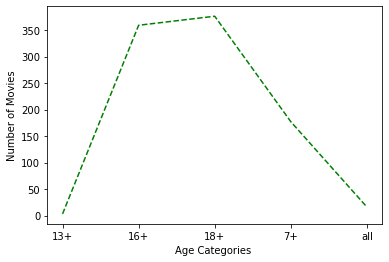

In [ ]:
plt.plot(AgeGroup, "g--")
plt.xlabel("Age Categories ")
plt.ylabel("Number of Movies")
plt.show()